# Grabbing Raw Data from Twiiter

In [1]:
import tweepy
import pandas as pd
import csv
import re 
import string
import webbrowser
from nltk.corpus import stopwords
import nltk
import spacy

import mysql.connector 
from mysql.connector import errorcode
import os
from csv import reader, writer
import random
import time
from mysql.connector import Error
%matplotlib inline
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
# nltk.download('stopwords')
# !pip install TextBlob


In [2]:
# function to display data of each tweet 

def printtweetdata(n, ith_tweet): 
    print() 
    print(f"Tweet {n}:") 
    print(f"Username:{ith_tweet[0]}") 
    print(f"Description:{ith_tweet[1]}") 
    print(f"Location:{ith_tweet[2]}") 
    print(f"Following Count:{ith_tweet[3]}") 
    print(f"Follower Count:{ith_tweet[4]}") 
    print(f"Total Tweets:{ith_tweet[5]}")
    print(f"Tweet ID:{ith_tweet[6]}")
    print(f"Source:{ith_tweet[7]}") 
    print(f"Tweet Date:{ith_tweet[8]}")
    print(f"Tweet Length:{ith_tweet[9]}")
    print(f"Likes Count:{ith_tweet[10]}")
    print(f"Retweet Count:{ith_tweet[11]}") 
    print(f"Tweet Text:{ith_tweet[12]}") 
    print(f"Hashtags Used:{ith_tweet[13]}") 

In [163]:
# function to perform data extraction 

def scrape(new_search, date_since, numtweet, filename): 
      
    # Creating DataFrame using pandas 
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following', 
                               'followers', 'totaltweets', 'tweetid', 'source', 'tweetdate',
                               'tweetlength', 'likescount', 'retweetcount', 'text', 'hashtags']) 
      
    # We are using .Cursor() to search through twitter for the required tweets. 
    # The number of tweets can be restricted using .items(number of tweets) 
    tweets = tweepy.Cursor(api.search, q=new_search, lang="en", 
                           since=date_since, tweet_mode='extended').items(numtweet) 
     
    # .Cursor() returns an iterable object. Each item in  
    # the iterator has various attributes that you can access to  
    # get information about each tweet 
    list_tweets = [tweet for tweet in tweets] 
      
    # Counter to maintain Tweet Count 
    i = 1  
      
    # we will iterate over each tweet in the list for extracting information about each tweet 
    for tweet in list_tweets: 
        username = tweet.user.screen_name 
        description = tweet.user.description 
        location = tweet.user.location 
        following = tweet.user.friends_count 
        followers = tweet.user.followers_count 
        totaltweets = tweet.user.statuses_count 
        tweetid = tweet.id
        source = tweet.source
        tweetdate = tweet.created_at
        likescount = tweet.favorite_count
        retweetcount = tweet.retweet_count 
        hashtags = tweet.entities['hashtags'] 
        text = tweet.full_text
        
        tweetlength = len(text)
        
        hashtext = list() 
        for j in range(0, len(hashtags)): 
            hashtext.append(hashtags[j]['text']) 
        
        
        
        # Here we are appending all the extracted information in the DataFrame 
        ith_tweet = [username, description, location, following, 
                     followers, totaltweets, tweetid, source, tweetdate, tweetlength, likescount, retweetcount, text, hashtext] 
        db.loc[len(db)] = ith_tweet 
          
        # Function call to print tweet data on screen 
#         printtweetdata(i, ith_tweet) 
        i = i+1
#     filename = 'scraped_tweets3.csv'
      
    # we will save our database as a CSV file. 
    db.to_csv(filename) 


In [173]:
# Credentials
    
# Enter your own credentials obtained  
# from your developer account 
consumer_key = 'pW8pg7cVOVMALruxzTncmfD2J'
consumer_secret = '63i8uPnJE4d4BDLxDlTQSguTRXGUfyUxWfWc2kAc07G1tQ4HNp'
access_token = '1210030934382325760-h5tW4FN6RgVmgCAhPjrOQFPrD933BF'
access_secret  = '2lf65A4htMOcsH3xPDRR8kv6o751X1TCZQTeLxyYjIbXD'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# Enter Hashtag and initial date 
print("Enter Twitter HashTag to search for") 
words = input() 
new_search = words + " -filter:retweets"
print("Enter Date since The Tweets are required in yyyy-mm--dd") 
date_since = input() 

# number of tweets you want to extract in one run 
numtweet = 1000
filename = "scraped_tweets8.csv"
scrape(new_search, date_since, numtweet, filename) 
print('Scraping has completed!') 
# #covid19vaccine since:2020-12-07 until:2020-12-10


Enter Twitter HashTag to search for
#covid19vaccine since:2020-12-03 until:2020-12-04
Enter Date since The Tweets are required in yyyy-mm--dd
2020-12-03
Scraping has completed!


# DATA CLEANING

In [247]:
df = pd.read_csv("all.csv")
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

print(len(df))
df.head()

4326


,username,description,location,following,followers,totaltweets,tweetid,source,tweetdate,tweetlength,likescount,retweetcount,text,hashtags
0,MomAgainstMedia,Writer/Activist/MAM/Survivor fka Desi Foxx Fig...,"Tampa Bay, FL USA",3054,2056,42554,1336822797360902145,Twitter for Android,2020-12-09 23:59:26,177,0,1,But is that WHOLE PORTFOLIO of #COVID19Vaccine...,['COVID19Vaccine']
1,MadjaTee,"Gardener, kayaker, hiker, “friend of Mara”, en...","New York, USA",336,89,3707,1336822562135945220,Twitter for iPhone,2020-12-09 23:58:30,186,1,0,"@CNYCentral Yes, when it is made available to ...","['COVID19Vaccine', 'JustDoIt']"
2,ElsaWSOC9,Reporter @wsoctv\nHost @Your704\n@Cornell grad...,"Charlotte, NC",582,3008,8211,1336822293901824009,Twitter for iPhone,2020-12-09 23:57:26,81,1,2,Questions about the #COVID19Vaccine? Tune in n...,['COVID19Vaccine']
3,SiDedman,Political Reporter @BBCNews @BBCEssex former @...,Chelmsford-London,3628,2462,12183,1336821987096879104,Twitter for iPhone,2020-12-09 23:56:13,148,5,0,Great to hear more from Martin Kenyon after hi...,['COVID19Vaccine']
4,TEk_InfoSys,Self-taught Python programmer. MBA in Finance ...,Puerto Rico,260,33,11,1336821947947167746,Twitter Web App,2020-12-09 23:56:03,167,0,0,Track Covid-19 cases in your state with USCovi...,"['Python', 'COVID19', 'COVIDSecondWave', 'COVI..."


In [248]:

df[['tweetdate']] = df['tweetdate'].str.split(' ',n=1,expand=True)[0]
df['len_hashtags'] = df['hashtags'].str.split(",").str.len()
df[['city','country']] = df['location'].str.split(',',n=1,expand=True)
df = df.dropna(subset=['country'])




In [249]:
def cleanTxt(text):
    text = re.sub(r'@[A-Z a-z 0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s] +', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    text = re.sub('[^\w\s]','', text)
    text = re.sub('_','',text)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji_pattern.sub(r'', text)
    

    return text

def space(comment):
    nlp = spacy.load('en', disable=['parser', 'ner'])
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])

def clean_country_values(df):
    states_ab = ['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA',
                   'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
                   'ND','MP', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 
                   'WI', 'WY', 'US']
    states = ['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
          'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 
          'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
          'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 
          'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 
          'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 
          'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
    
    EUROPEAN_UNION = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 
                      'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 
                      'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
    
    eu = [i.upper() for i in EUROPEAN_UNION]
    states = [i.upper() for i in states]
    df.drop(df[df['country'].str.isspace()].index, inplace = True) 
    
    df['country'] = df['country'].str.upper()

    df['country'] = df['country'].str.replace('\d+', '')
    df.loc[df['country'].str.contains('ENGLAND', case=False), 'country'] = 'ENGLAND'
    df.loc[df['country'].str.contains('CANADA', case=False), 'country'] = 'CANADA'
    df.loc[df['country'].str.contains('US', case=False), 'country'] = 'USA'

    df['country'] = df['country'].replace(
        dict.fromkeys(['UK'], 'England'), 
        regex=False
    )
    df['country'] = df['country'].replace(
        dict.fromkeys(states, 'USA'), 
        regex=False
    )
    df['country'] = df['country'].replace(
        dict.fromkeys(states_ab, 'USA'), 
        regex=False
    )
    df['country'] = df['country'].replace(
        dict.fromkeys(eu, 'EUROPE'), 
        regex=False
    )
    df['country'] = df['country'].str.replace('[^a-zA-Z]', '')
    df.drop(df[df['country'].str.isspace()].index, inplace = True) 
    return df
def clean_source(df):
    df['source'] = df['source'].str.upper()
    df.loc[df['source'].str.contains('IP', case=False), 'source'] = 'APPLE'
    df.loc[df['source'].str.contains('ANDROID', case=False), 'source'] = 'ANDROID'
    df.loc[df['source'].str.contains('WEB', case=False), 'source'] = 'WEB'

    return df
print('I started the cleaning process...., go get a coefee, this might take few minutes')
tweets = df
tweets['text'] = tweets['text'].apply(cleanTxt)
stop = stopwords.words('english')
tweets.drop(tweets[tweets['text'].str.isspace()].index, inplace = True) 

tweets['text'] = tweets['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


I started the cleaning process...., go get a coefee, this might take few minutes


In [250]:
# print(tweets.source.value_counts())
tweets = clean_country_values(tweets)
tweets = clean_source(tweets)


In [251]:
tweets.to_csv("all_cleaned_and_source.csv")

[('covid19vaccine', 1908), ('vaccine', 716), ('covid19', 628), ('get', 221), ('first', 179), ('covid', 174), ('amp', 156), ('vaccines', 138), ('pfizer', 138), ('people', 129)]


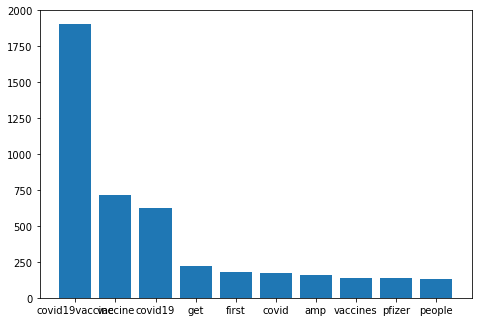

In [258]:
mcw = Counter(" ".join(tweets["text"]).split()).most_common(10)
print(mcw)
fig = plt.figure()
words = [mcw[i][0] for i in range(len(mcw))]
counts = [mcw[i][1] for i in range(len(mcw))]
ax = fig.add_axes([0,0,1,1])
ax.bar(words, counts)
plt.show()

# Sentimental Analysis

In [259]:
# Create a function to get the subjectivity

def getSubjectivity(tweetText):
    return TextBlob(tweetText).sentiment.subjectivity

# Create a function to get the polarity

def getPolarity(tweetText):
    return TextBlob(tweetText).sentiment.polarity

In [260]:
# Create two new columns

tweets['Subjectivity'] = tweets['text'].apply(getSubjectivity)
tweets['Polarity'] = tweets['text'].apply(getPolarity)

In [261]:
tweets.head()

,username,description,location,following,followers,totaltweets,tweetid,source,tweetdate,tweetlength,likescount,retweetcount,text,hashtags,len_hashtags,city,country,Subjectivity,Polarity
0,MomAgainstMedia,Writer/Activist/MAM/Survivor fka Desi Foxx Fig...,"Tampa Bay, FL USA",3054,2056,42554,1336822797360902145,ANDROID,2020-12-09,177,0,1,whole portfolio covid19vaccine free aborted fe...,['COVID19Vaccine'],1,Tampa Bay,USA,0.666667,0.333333
1,MadjaTee,"Gardener, kayaker, hiker, “friend of Mara”, en...","New York, USA",336,89,3707,1336822562135945220,APPLE,2020-12-09,186,1,0,made available excited glad part reopen econom...,"['COVID19Vaccine', 'JustDoIt']",2,New York,USA,0.560000,0.285000
2,ElsaWSOC9,Reporter @wsoctv\nHost @Your704\n@Cornell grad...,"Charlotte, NC",582,3008,8211,1336822293901824009,APPLE,2020-12-09,81,1,2,questions covid19vaccine tune tcoek9euth4b6,['COVID19Vaccine'],1,Charlotte,NC,0.000000,0.000000
5,jendlake,Theme Lead @uoftmedicine/ PhD student @ihpmeuo...,"Toronto, ON CANADA",3921,2490,20177,1336821906364837888,ANDROID,2020-12-09,152,2,0,good thread covid covid19vaccine allergies ess...,"['covid', 'COVID19Vaccine', 'allergies']",3,Toronto,CANADA,0.300000,0.233333
7,EddieMaqbool,NaN,"Secaucus, NJ",27,2,104,1336821674109497351,ANDROID,2020-12-09,232,3,0,f israel getting vaccine uk canada approved st...,"['COVID19', 'COVID19Vaccine', 'COVID']",3,Secaucus,NJ,0.500000,-0.250000


<function matplotlib.pyplot.show(*args, **kw)>

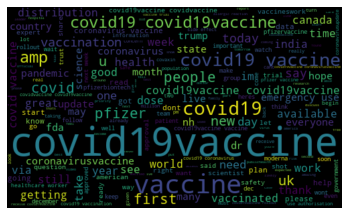

In [262]:
# Plot the World Cloud

AllWords = '  '. join( [twts for twts in tweets['text']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(AllWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show

In [263]:
# Create a function to compute the negative, neutral, and positive analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
tweets['Analysis'] = tweets['Polarity'].apply(getAnalysis)
tweets.head()

,username,description,location,following,followers,totaltweets,tweetid,source,tweetdate,tweetlength,likescount,retweetcount,text,hashtags,len_hashtags,city,country,Subjectivity,Polarity,Analysis
0,MomAgainstMedia,Writer/Activist/MAM/Survivor fka Desi Foxx Fig...,"Tampa Bay, FL USA",3054,2056,42554,1336822797360902145,ANDROID,2020-12-09,177,0,1,whole portfolio covid19vaccine free aborted fe...,['COVID19Vaccine'],1,Tampa Bay,USA,0.666667,0.333333,Positive
1,MadjaTee,"Gardener, kayaker, hiker, “friend of Mara”, en...","New York, USA",336,89,3707,1336822562135945220,APPLE,2020-12-09,186,1,0,made available excited glad part reopen econom...,"['COVID19Vaccine', 'JustDoIt']",2,New York,USA,0.560000,0.285000,Positive
2,ElsaWSOC9,Reporter @wsoctv\nHost @Your704\n@Cornell grad...,"Charlotte, NC",582,3008,8211,1336822293901824009,APPLE,2020-12-09,81,1,2,questions covid19vaccine tune tcoek9euth4b6,['COVID19Vaccine'],1,Charlotte,NC,0.000000,0.000000,Neutral
5,jendlake,Theme Lead @uoftmedicine/ PhD student @ihpmeuo...,"Toronto, ON CANADA",3921,2490,20177,1336821906364837888,ANDROID,2020-12-09,152,2,0,good thread covid covid19vaccine allergies ess...,"['covid', 'COVID19Vaccine', 'allergies']",3,Toronto,CANADA,0.300000,0.233333,Positive
7,EddieMaqbool,NaN,"Secaucus, NJ",27,2,104,1336821674109497351,ANDROID,2020-12-09,232,3,0,f israel getting vaccine uk canada approved st...,"['COVID19', 'COVID19Vaccine', 'COVID']",3,Secaucus,NJ,0.500000,-0.250000,Negative


In [243]:
# # Print all of the positive tweets

# j = 1
# sortedtweets = tweets.sort_values(by=['Polarity'])
# for i in range(0, sortedtweets.shape[0]):
#     print(i)
#     if (sortedtweets['Analysis'][i] == 'Positive'):
#         print(str(j) + ') ' +sortedtweets['text'][i])
#         print()
#         j = j+1

In [244]:
# # Print all of the negative tweets

# j = 1
# sortedTweets = tweets.sort_values(by=['Polarity'], ascending = 'False')
# for i in range(0, sortedtweets.shape[0]):
#     if (sortedTweets['Analysis'][i] == 'Negative'):
#         print(str(j) + ') ' +sortedTweets['text'][i])
#         print()
#         j = j+1

In [1]:
# Plot the polarity and subjectivity

plt.figure(figsize = (8,6))
for i in range(0, tweets.shape[0]):
    plt.scatter(tweets['Polarity'][i], tweets['Subjectivity'][i], color = 'Purple')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

NameError: name 'plt' is not defined

In [30]:
# Get the percentage of positive tweets

ptweets = tweets[tweets.Analysis == 'Positive']
ptweets = ptweets['text']

# round((ptweets.shape[0] / tweets.shape[0]) * 100, 1)


0    adrenaline intense suspense music copyright op...
3    matt hanock say willing take covid19vaccine tv...
4           bangladesh ready distribute covid19vaccine
5    healthcare worker get free mhra approve vaccin...
6    ready mandate vaccine mainstream outlet seem t...
Name: text, dtype: object

In [22]:
# Get the percentage of negative tweets

ntweets = tweets[tweets.Analysis == 'Negative']
ntweets = ntweets['text']

round((ntweets.shape[0] / tweets.shape[0]) * 100, 1)

19.0

In [23]:
# Get the percentage of neutral tweets

neutweets = tweets[tweets.Analysis == 'Neutral']
neutweets = neutweets['text']

round((neutweets.shape[0] / tweets.shape[0]) * 100, 1)

37.0

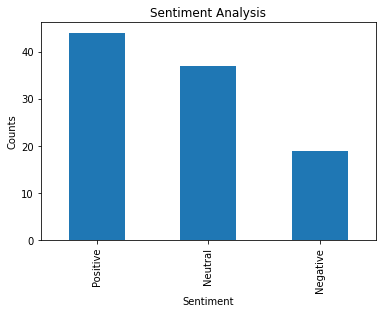

In [24]:
# Show the value counts

tweets['Analysis'].value_counts

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [265]:
tweets.to_csv("all_cleaned_src_analysis.csv")

In [266]:
xxx = pd.read_csv("all_cleaned_src_analysis.csv")
print(len(xxx))
tweets.head()

1918


,username,description,location,following,followers,totaltweets,tweetid,source,tweetdate,tweetlength,likescount,retweetcount,text,hashtags,len_hashtags,city,country,Subjectivity,Polarity,Analysis
0,MomAgainstMedia,Writer/Activist/MAM/Survivor fka Desi Foxx Fig...,"Tampa Bay, FL USA",3054,2056,42554,1336822797360902145,ANDROID,2020-12-09,177,0,1,whole portfolio covid19vaccine free aborted fe...,['COVID19Vaccine'],1,Tampa Bay,USA,0.666667,0.333333,Positive
1,MadjaTee,"Gardener, kayaker, hiker, “friend of Mara”, en...","New York, USA",336,89,3707,1336822562135945220,APPLE,2020-12-09,186,1,0,made available excited glad part reopen econom...,"['COVID19Vaccine', 'JustDoIt']",2,New York,USA,0.560000,0.285000,Positive
2,ElsaWSOC9,Reporter @wsoctv\nHost @Your704\n@Cornell grad...,"Charlotte, NC",582,3008,8211,1336822293901824009,APPLE,2020-12-09,81,1,2,questions covid19vaccine tune tcoek9euth4b6,['COVID19Vaccine'],1,Charlotte,NC,0.000000,0.000000,Neutral
5,jendlake,Theme Lead @uoftmedicine/ PhD student @ihpmeuo...,"Toronto, ON CANADA",3921,2490,20177,1336821906364837888,ANDROID,2020-12-09,152,2,0,good thread covid covid19vaccine allergies ess...,"['covid', 'COVID19Vaccine', 'allergies']",3,Toronto,CANADA,0.300000,0.233333,Positive
7,EddieMaqbool,NaN,"Secaucus, NJ",27,2,104,1336821674109497351,ANDROID,2020-12-09,232,3,0,f israel getting vaccine uk canada approved st...,"['COVID19', 'COVID19Vaccine', 'COVID']",3,Secaucus,NJ,0.500000,-0.250000,Negative


# Inserting the Data into MySQL

In [49]:
# Establishing a connection with MySQL and Reading the data
try:
    connection = mysql.connector.connect(host='localhost',
                                         user='root',
                                         password='root')
    
    mySql_Create_Database_Query = """CREATE DATABASE IF NOT EXISTS twitter2"""

    mySql_Create_Table_Query = """CREATE TABLE IF NOT EXISTS twitter2.Tweets2 ( 
                                 UserName varchar(250) NOT NULL,
                                 Description text NULL,
                                 Location varchar(200) NULL,
                                 Following varchar(200) NULL,
                                 Followers varchar(200) NULL,
                                 TotalTweets varchar(200) NULL,
                                 TweetId varchar(19) NOT NULL,
                                 Source varchar(200) NULL,
                                 TweetDate text NULL,
                                 TweetLength varchar(200) NULL,
                                 LikesCount varchar(200) NULL,
                                 RetweetCount varchar(200) NULL,
                                 TweetText text NULL,
                                 Hashtags text NULL,

                                 PRIMARY KEY (TweetId)); """

    cursor = connection.cursor()
    
    result = cursor.execute(mySql_Create_Database_Query)
    result1 = cursor.execute(mySql_Create_Table_Query)
    
    print("Twitter Database created successfully ")
    print("Tweets Table created successfully ")

except mysql.connector.Error as error:
    print("Failed to create table in MySQL: {}".format(error))
finally:
    if (connection.is_connected()):
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

infiletest = open("scraped_tweets.csv", encoding="utf8")
csvReader = reader(infiletest)

Twitter Database created successfully 
Tweets Table created successfully 
MySQL connection is closed


In [50]:
connection = mysql.connector.connect(host='localhost',
                                         database='twitter2',
                                         user='root',
                                         password='root')
cursor = connection.cursor()

('Tweets', 'CREATE TABLE `tweets` (\n  `TweetId` int NOT NULL,\n  `UserName` varchar(250) NOT NULL,\n  `Description` text,\n  `Location` varchar(45) DEFAULT NULL,\n  `Following` varchar(45) DEFAULT NULL,\n  `Followers` varchar(45) DEFAULT NULL,\n  `TotalTweets` varchar(45) DEFAULT NULL,\n  `Source` varchar(45) DEFAULT NULL,\n  `TweetDate` text,\n  `LikesCount` varchar(45) DEFAULT NULL,\n  `RetweetCount` varchar(45) DEFAULT NULL,\n  `TweetText` text,\n  `Hashtags` text,\n  PRIMARY KEY (`TweetId`)\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci') 

In [51]:
# Insert the data into MySQL
for row in csvReader:
    cursor.execute("INSERT INTO twitter2.Tweets2 (UserName, Description,Location, Following ,Followers, TotalTweets,TweetId, Source, TweetDate, TweetLength, LikesCount, RetweetCount ,TweetText, Hashtags) VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", [row[1], row[2], row[3], row[4], row[5], row[6], row[7] ,row[8], row[9], row[10], row[11], row[12], row[13], row[14]])
    connection.commit()

    

In [144]:
# In case we needed to drop a table
def drop_table(table_name):
    sql_drop = f"DROP TABLE twitter2.{table_name}"
    cursor.execute(sql_drop)
# drop_table('Tweets')

In [170]:
# In case we need to delete the data from MySQL
def delete_operation():
    sql = "DELETE FROM twitter2.Tweets WHERE TweetId >= '0'" 

    try:
       # Execute the SQL command
       cursor.execute(sql)

       # Commit your changes in the database
       connection.commit()
    except:
       # Roll back in case there is any error
       connection.rollback()

In [52]:
try:
    cursor.execute("SELECT * FROM twitter2.Tweets;")

    myresult = cursor.fetchall()
    for i in myresult:
        print(i, '\n')
except:
    print("Table does not Exist")


('jpanjy', 'filmmaking', '🇱🇧🇦🇲', '215', '151', '487', '1336460081739812864', 'Twitter for Android', '2020-12-08 23:58:08', '170', '1', '0', 'fuck AUB\nfuck LAU\nfuck USJ\nfuck NDU\nfuck USEK\nfuck RHU\nfuck LU\nfuck LIU\nfuck Sagesse\nfuck Antonine\nfuck all Lebanese unis. fuck them.\na mirror of the Lebanese government.', '[]') 

('_IAmYoFather', 'You play stupid games, you win stupid prizes.\n\nMed Student👨🏽\u200d⚕️\nHe/Him', '', '745', '991', '10667', '1336461255071174666', 'Twitter for Android', '2020-12-09 00:02:48', '43', '14', '0', 'I have 3900 problems and AUB is all of them', '[]') 

('wallyplant', 'Freedom is a fragile thing...It is not ours by inheritance; it must be fought for and defended constantly by each generation', 'Beirut', '551', '181', '7034', '1336462051657412608', 'Twitter for Android', '2020-12-09 00:05:58', '142', '0', '0', '@Nizhsn People are going to go the universities in the Gulf - King Abdulaziz University in Saudi is already ahead of AUB in quite a few fi

In [53]:
from_sql = pd.DataFrame(myresult, columns =['UserName', 'Description', 'Location', 'Following', 'Followers','TotalTweets', 'TweetId', 'Source', 'TweetDate', 'TweetLength','LikesCount', 'RetweetCount', 'TweetText', 'Hashtags'])
from_sql.head()


,UserName,Description,Location,Following,Followers,TotalTweets,TweetId,Source,TweetDate,TweetLength,LikesCount,RetweetCount,TweetText,Hashtags
0,jpanjy,filmmaking,🇱🇧🇦🇲,215,151,487,1336460081739812864,Twitter for Android,2020-12-08 23:58:08,170,1,0,fuck AUB\nfuck LAU\nfuck USJ\nfuck NDU\nfuck U...,[]
1,_IAmYoFather,"You play stupid games, you win stupid prizes.\...",,745,991,10667,1336461255071174666,Twitter for Android,2020-12-09 00:02:48,43,14,0,I have 3900 problems and AUB is all of them,[]
2,wallyplant,Freedom is a fragile thing...It is not ours by...,Beirut,551,181,7034,1336462051657412608,Twitter for Android,2020-12-09 00:05:58,142,0,0,@Nizhsn People are going to go the universitie...,[]
3,aub_bot,hey hey hey hey hey hey budyd,,1,16,60020,1336462329353891841,twittbot.net,2020-12-09 00:07:04,92,0,0,sjws came into my home and kissed me gently on...,[]
4,FarahShamii,Freelance Producer • Former Producer at AlJade...,Somewhere,1192,2316,38013,1336462755524726785,Twitter for iPhone,2020-12-09 00:08:45,14,1,0,AUB Students✌🏼,[]
